In [1]:
# Imports

from bs4 import BeautifulSoup
import requests
import pandas as pd

import matplotlib.pyplot as plt

# I installed this module using pip install
from neuralprophet import NeuralProphet

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
#Parsing the html data from the website
url2 = 'https://www.portfolio-property.com/interest-rates'
respond2 = requests.get(url2)
html2 = respond2.text
soup2 = BeautifulSoup(html2,'html.parser')

In [3]:
#retrieving the text string of each row in the table, and slicing out the rest of the neccesary characters for percentage
#User forloop to create a list of percentages

percentage_value= []
for i in range(len(soup2.find_all('tr'))):
    id =soup2.find_all('tr')[i].text.strip()
    count = 0
    percentage =''
    for j in id:
        if count<(len(id)-12):
            percentage = percentage + j
        else:
            percentage = percentage
        count +=1

    percentage_value = percentage_value + [percentage]
    

In [4]:
#retrieving the text string of each row in the table, and slicing out the rest of the neccesary characters for date
#Using a forloop to create a list of dates

date_value= []
for i in range(len(soup2.find_all('tr'))):
    id =soup2.find_all('tr')[i].text.strip()
    date=id[slice(9,len(id))]
    if len(date) == 4:
        date = id[slice(3,len(id))]
    if len(date) == 5:
        date = id[slice(4,len(id))]
    if len(date) == 6:
        date = id[slice(5,len(id))]
    if len(date) == 7:
        date = id[slice(6,len(id))]
    if len(date) == 8:
        date = id[slice(7,len(id))]
    if len(date) == 9:
        date = id[slice(10,len(id))]       
    date_value = date_value + [date]

In [5]:
#Create a dataframe with the lists created above

df = pd.DataFrame({
    'Dates': date_value,
    'Rate(%)':percentage_value
    
})

In [6]:
#Dropping the first 2 rows since they contain useless information
df = df.drop(0) 
df = df.drop(1)

In [7]:
#converting each string element in rates list into a float
listed = []
for i in df['Rate(%)']:
    listed = listed + [ float(i) ]

In [8]:
#Creating a new dataframe df2 from df with the converted rate values

df2 = pd.DataFrame({
    'Dates': df['Dates'],
    'Rate(%)':listed
    
})

In [10]:
#Creating a new dataframe df3 from df2 with renamed columns
#The purpose of this is prepare the dataframe to put into the model

df3=df2.rename(
    columns =(
        {
            'Dates':'ds',
            'Rate(%)':'y'
        }
    )
)

In [11]:
df3.head()

,ds,y
2,2023-03-30,11.25
3,2023-01-26,10.75
4,2022-11-24,10.50
5,2022-09-22,9.75
6,2022-07-21,9.00


In [12]:
#Converting the data type of the elements in ds column to datetime

df3['ds'] = pd.to_datetime(df3['ds'])
df3.head(10)

,ds,y
2,2023-03-30,11.25
3,2023-01-26,10.75
4,2022-11-24,10.50
5,2022-09-22,9.75
6,2022-07-21,9.00
7,2022-05-19,8.25
8,2022-03-24,7.75
9,2022-01-28,7.50
10,2021-11-18,7.25
11,2020-07-24,7.00


<Axes: xlabel='ds'>

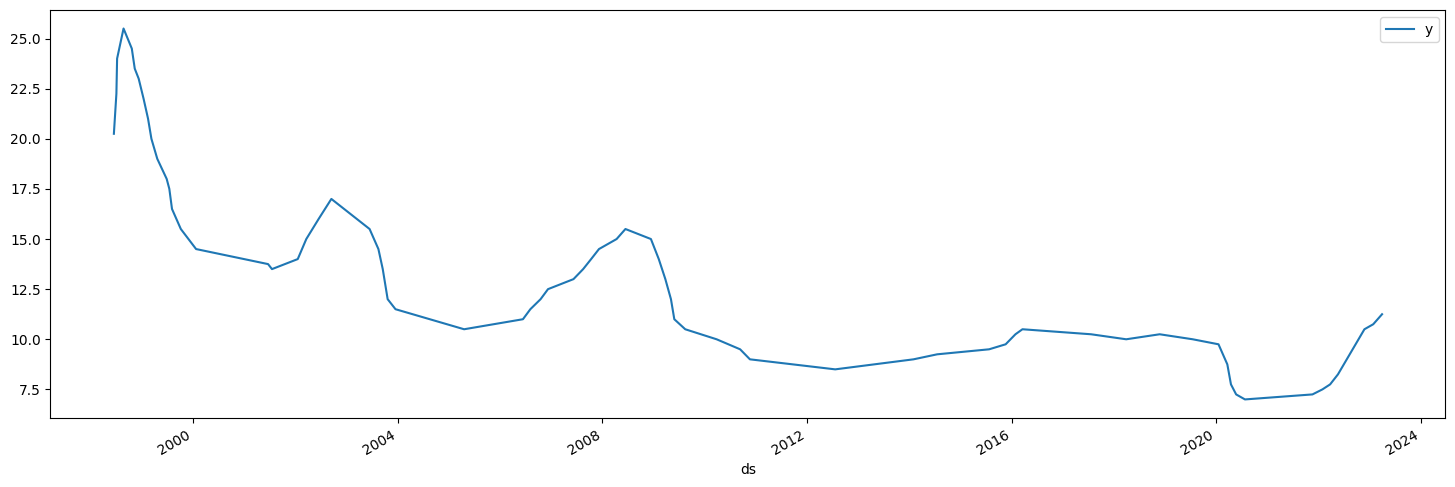

In [13]:
#Plotting the df3 values
#y-axis is for percentages
#x - axis id for the dates

df3.plot(x='ds',y='y',figsize=(18,6))

In [58]:
#Initializing the model
model = NeuralProphet(
       
    learning_rate=0.09,         # Set the learning rate (adjust as needed)
    epochs=20000,                 # Set the number of epochs (adjust as needed)
       
)

In [59]:
#Training the model with frequency of 2 months

model.fit(df3, freq='2M')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency -9W-THU corresponds to 13.699% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq 2M. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_se

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,13.861876,16.629747,0.487524,0.0,0
1,10.274366,13.076998,0.336110,0.0,1
2,9.174088,11.438853,0.280331,0.0,2
3,8.734653,11.045586,0.283628,0.0,3
4,7.112350,9.005099,0.198884,0.0,4
...,...,...,...,...,...
19995,0.777508,0.939529,0.004360,0.0,19995
19996,0.752982,0.938474,0.004195,0.0,19996
19997,0.831132,1.004378,0.004892,0.0,19997
19998,0.724111,0.866388,0.004071,0.0,19998


WARNING - (py.warnings._showwarnmsg) - C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency -9W-THU corresponds to 13.699% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq 2M. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
WARNING - (py.warnings._showwarnmsg) - C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:983: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date

Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency -9W-THU corresponds to 13.699% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq 2M. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
WARNING - (py.warnings._showwarnmsg) - C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecate

Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabel'

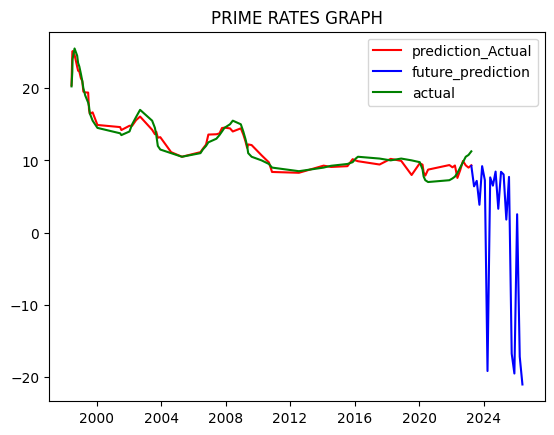

In [74]:
#Model Evaluation

future = model.make_future_dataframe(df3,periods=20)
forecast = model.predict(future)
actual_prediction = model.predict(df3)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = "prediction_Actual", c = 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c = 'b')
plt.plot(df3['ds'], df3['y'], label = 'actual', c = 'g')
plt.legend()
plt.title('PRIME RATES GRAPH')

plt.set_ylabel('Interest (% pa)')
plt.set_xlabel('Effective Rate')

plt.show()

<Axes: title={'center': 'PRIME LENDING RATE'}, xlabel='Effective Rate', ylabel='Interest (% pa)'>

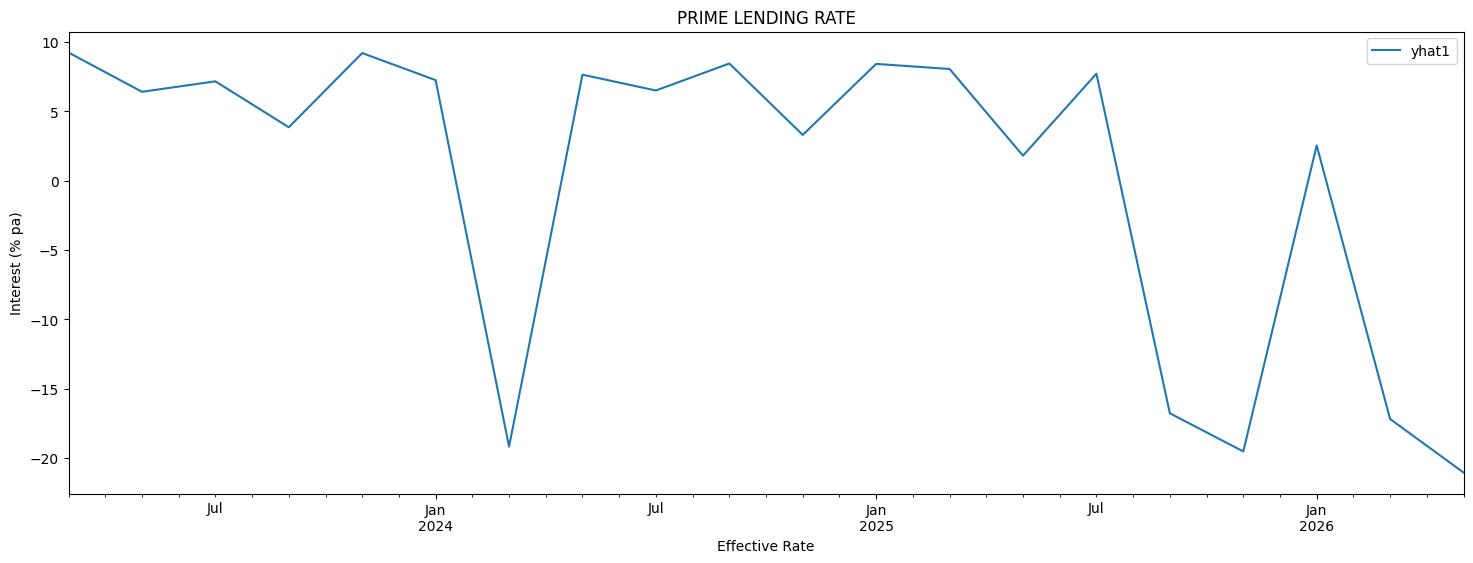

In [69]:
forecast.plot(x='ds',y='yhat1',figsize=(18,6),ylabel='Interest (% pa)',xlabel='Effective Rate',title='PRIME LENDING RATE')
